# Vectors in 3D
> arithmetic operations on 3D vectors

## SUMMARY 
+ Building a mental model for 3D vectors
+ 3D vector arithmetic
+ Dot product, Cross Product, lengths and directions
+ Drawing a 3D object in 2D (*rendering*)

## Drawing 3D Vectors in Python

Vectors (and points) in the 3D space are represented by a tuple $ \vec{v} = (x, y, z) $.

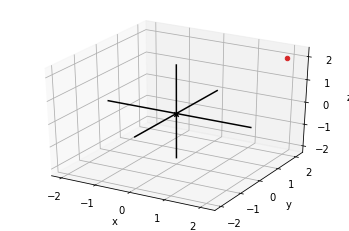

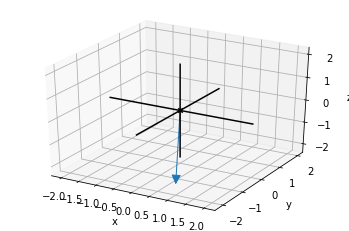

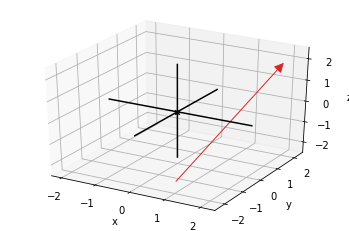

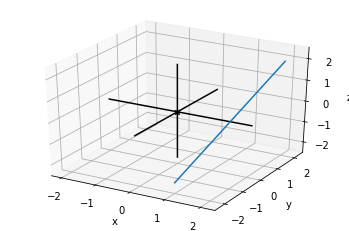

In [1]:
from draw3d import draw3d, Points3D, Arrow3D, Segment3D, red, blue

# single point
draw3d(
    Points3D((2, 2, 2), color=red)
)

# single vector, using default tail (0, 0, 0)
draw3d(
    Arrow3D((1, -2, -2), color=blue)
)

# single vector, using custom tail (1, -2, -2)
draw3d(
    Arrow3D((2, 2, 2), (1, -2, -2))
)

# segment
draw3d(
    Segment3D((2, 2, 2), (1, -2, -2))
)

Additionally, the `draw3d` library exposes a Box3D class that helps with the visualization.
`Box3D` represents a box with one corner at the origin and the opposite one at the given point.

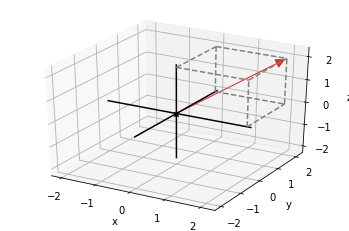

In [2]:
from draw3d import Box3D

draw3d(
    Box3D(2, 2, 2),
    Arrow3D((2, 2, 2))
)


## Vector Arithmetic in 3D

All of the arithmetic operations in 2D have analogies in 3D, and the geometric effects of those are similar in the 3D space.

### Adding 3D vectors

The vector addition can be accomplished by adding the Cartesian coordinates of the vectors. Also, the *tip-to-tail* geometric representation of the addition works in the 3D space.

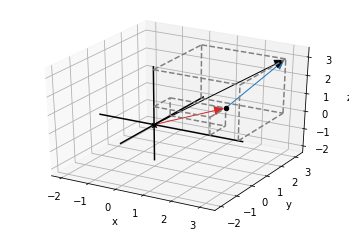

In [3]:
from draw3d import black

def add(*vectors):
    return (sum(v[0] for v in vectors), sum(v[1] for v in vectors), sum(v[2] for v in vectors))

sum_vector = add((2, 1, 1), (1, 2, 2))

draw3d(
    Points3D((2, 1, 1)),
    Arrow3D((2, 1, 1), color=red),
    Arrow3D(sum_vector, (2, 1, 1), color=blue),
    Arrow3D(sum_vector, color=black),
    Box3D(2, 1, 1),
    Box3D(*sum_vector)
)

Vector addition is commutative, and *tip-to-tail* can be applied as well when adding more than 2 vectors.

(7, 7, -3)


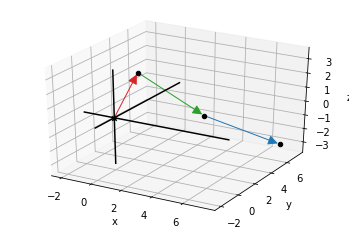

In [4]:
from draw3d import green

v1 = (1, 1, 3)
v2 = (2, 4, -4)
v3 = (4, 2, -2)

sum_vector = add(v1, v2, v3)

print(sum_vector)

draw3d(
    Arrow3D(v1, color = red),
    Arrow3D(add(v1, v2), v1, color=green), Points3D(v1),
    Arrow3D(add(v1, v2, v3), add(v1, v2), color=blue), Points3D(add(v1, v2)), Points3D(sum_vector)
)


We can write a generalized function for adding vectors that is both concise and efficient. This will work for 2D vectors, 3D vectors and even for vectors defined in spaces with more than 3 dimensions:

In [5]:
def add(*vectors):
    # this creates a list of tuples, with each tuple having all the x, y and z coordinates
    # e.g. zip((1, 2, 3), (4, 5, 6), (7, 8, 9)) = [(1, 4, 7), (2, 5, 8), (3, 6, 9)]
    by_coordinate = zip(*vectors) 

    # this creates a list with three elements, each one is the sum of the corresponding elements in the tuple
    # e.g. [sum(coords for coords in [(1, 4, 7), (2, 5, 8), (3, 6, 9)])] = [12, 15, 18]
    coordinate_sums = [sum(coords) for coords in by_coordinate]

    # finally, we transform the list into a tuple
    # e.g. [12, 15, 18] = (12, 15, 18)
    return tuple(coordinate_sums)

print(add((1, 2, 3), (4, 5, 6), (7, 8, 9)))

(12, 15, 18)


Note that there's even a way to write it more succinctly, at the cost of making it less readable:

In [6]:
def add_one_liner(*vectors):
    return tuple(map(sum, zip(*vectors)))

print(add_one_liner((1, 2, 3), (4, 5, 6), (7, 8, 9)))

(12, 15, 18)


### Scalar Multiplication in 3D

Same rule and geometric representation of scalar multiplication in 2D applies to the 3D world.

For example, $ 2 \cdot (1, 2, 3) = (2, 4, 6) $, so $ (2, 4, 6) $ is twice as long and in the same direction as $ (1, 2, 3)

(2, 4, 6)


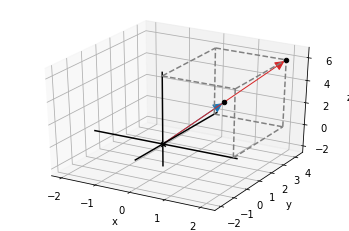

In [7]:
def scale(factor, vector):
    return tuple( factor * v_i for v_i in vector )

v = (1, 2, 3)
scaled_v = scale(2, v)
print(scaled_v)

draw3d(
    Arrow3D(v, color=blue), Points3D(v),
    Arrow3D(scaled_v, color=red), Points3D(scaled_v),
    Box3D(*scaled_v)
)


### Subtracting 3D Vectors

Same rule and geometric representation of vector subtraction in the 2D plane applies to the 3D world.

Given two vectors $ v $ and $ w $, $ v - w $ is the *displacement* from $ w $ to $ v $. That is, $ v - w $ is the vector that you have to add to $ w $ to get to $ v $.

Displacement from w to v = (-4, -5, -1)


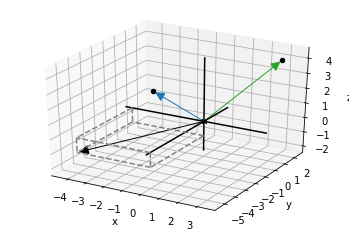

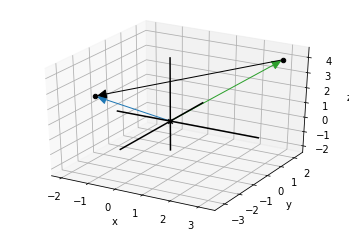

In [8]:
def subtract(v, w):
    return tuple( v[i] - w[i] for i in range(0, len(v)))

v = (-1, -3, 3)
w = (3, 2, 4)

print('Displacement from w to v = {}'.format(subtract(v, w)))

draw3d(
    Arrow3D(v, color=blue), Points3D(v),
    Arrow3D(w, color=green), Points3D(w),
    Arrow3D(subtract(v, w), color=black),
    Box3D(*subtract(v, w))
)


draw3d(
    Arrow3D(v, color=blue), Points3D(v),
    Arrow3D(w, color=green), Points3D(w),
    Arrow3D(v, w, color=black)
)

### Computing Lengths and Distances for 3D Vectors

Although we cannot apply the *Pythagorean theorem* right away, to compute the length of a vector, the formula to compute the length is a generalization of the formula for 2D:

$
\vec{v} = (x, y, z) \\
length(v) = | \vec{v} | = \sqrt{x^{2} + y^{2} + z^{2}}
$

Let's see where this formula comes from:

Let's say we have a vector $ \vec{v} = (x, y z) $

We can *build* this vector as:
$ (x, y, 0) + (0, 0, z) $

That will help as we will be able to apply the *Pythagorean theorem* if we apply this decomposition.

Let's visualize it geometrically, with the $ z = 0 $ components of the vector drawn in red

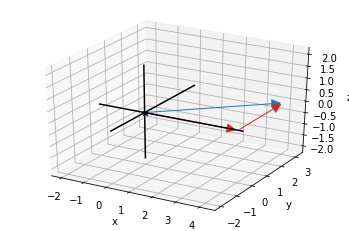

In [9]:
v = (4, 3, 12)

v_flat = (4, 3, 0)

draw3d(
    Arrow3D((4, 3, 0), color= blue),
    Arrow3D((4, 0, 0), color=red),
    Arrow3D((4, 3, 0), (4, 0, 0), color=red)
)


The blue vector is the vector $ (x, y, 0) $ which happens also to be the hypotenuse of the right triangle whose sides are the vectors $ (x, 0, 0) $ and $ (0, y, 0) $

Let's label this component as $ w $.

Then:

$
length(w) = | \vec{w} | = \sqrt{x^{2} + y^{2}}
$

As $ v = w + (0, 0, z) $, we can apply again the *Pythagorean theorem*:

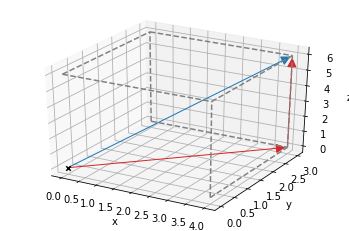

In [10]:
draw3d(
    Arrow3D((4, 3, 0), color=red),
    Arrow3D((4, 3, 6), (4, 3, 0), color=red),
    Arrow3D((4, 3, 6), color= blue),
    Box3D(4, 3, 6),
    axes=None
)

The red vector with z = 0 is $ w $, and the red perpendicular vector to the plane z = 0 is $ (0, 0, z) $.

Note that then, the blue vector happens to be the hypotenuse of another right triangle whose sides are the red vectors. Also, this vector is $ v = (x, y, z) $ $, the vector whose length we want to calculate.

As such:

$
length(v) = | \vec{v} | = \sqrt{(\sqrt{x^{2} + y^{2}})^{2} + z^2} = \\
= \sqrt{x^{2} + y^{2} + z^{2}}
$

Now, we can generalize the length function in Python for a vector in any dimension:

In [11]:
from math import sqrt

def length(v):
    return sqrt(sum([ v_i ** 2 for v_i in v]))

print('|(4, 3, 12)| = {}'.format(length((4, 3, 12))))

|(4, 3, 12)| = 13.0


### Spherical Coordinates in 3D: Angles and Directions

In 3D, one angle is not sufficient to specify a direction, so an additional one is needed.

For the first angle, we can again think of the vector without its *z* coordinate. This can be interpreted also as the projection of the vector in the plane z = 0.

This vector on the z = 0 plane will make some angle with the x axis (we'll label this angle as $ \phi $), and we can also consider the angle that the vector makes with the z index (which we'll label $ \theta $).

These three components: the length of the vector $ r $, $ \phi $, and $ \theta $ are called the spherical coordinates of the vector.

![Spherical Coordinates](../images/spherical_coordinates.png)

While the *polar coordinates* in 2D were conducive to rotations, as with a simple addition or subtraction we could rotate vectors and 2D shapes, the same is not true for the *spherical coordinates*. Therefore, the usefulness of that coordinate system does not have the same practical significance as the *polar coordinates* do in 2D.

## The *dot* product: Measuring vector alignment

Besides the scalar product used to multiply a vector with a real number, there are two ways in which vectors can be multiplied together:
+ the *dot product*, written as $ u \cdot v $, and returns an scalar
+ the *cross product*, denoted as $ u \times v $, and returns a vector

### The dot product

The dot product of two vectors $ u \cdot v $ is an operation that returns an scalars.

You can think of the dot product as a way to measure *how aligned* a pair of vectors are.

It is defined as follows:

Let $ u = (u_1, u_2, ..., u_n) $ and $ v = (v_1, v_2, ..., v_n) $ then:
$
u \cdot v = u_1 \cdot v_1 + u_2 \cdot v_2 + ... + u_n \cdot v_n
$

Then for example:
$
(1, 2, -1) \cdot (3, 0, 3) = 1 \cdot 3 + 2 \cdot 0 + -1 \cdot 3 = 0
$

Let's define the dot product as a function and start visualizing several vectors and their dot product:

u · v = 18


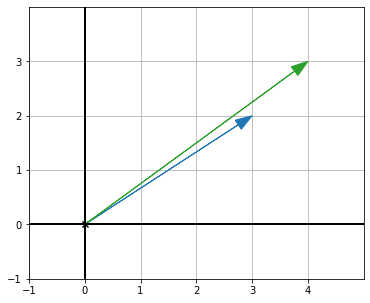

In [12]:
from math import prod
from draw2d import Arrow2D, draw2d, blue, green

def dot_product(u, v):
    by_coordinate_list = zip(u, v)
    product_by_coordinate = [prod(coords) for coords in by_coordinate_list]
    return sum(product_by_coordinate)


# Let u, v
u = (3, 2)
v = (4, 3)

dot_product_result = dot_product(u, v)

print('u · v = {}'.format(dot_product_result))

draw2d(
    Arrow2D(u, color=blue),
    Arrow2D(v, color=green)
)


We see that $ u $ and $ v $ are somewhat aligned, and their dot product is 18.

Let's now see what is the dot product of two vectors pointing also pointing to a similar direction but smaller than the previous ones:

u · v = 2.88


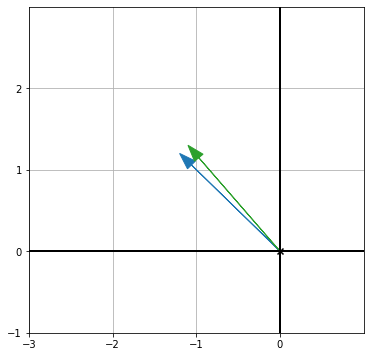

In [13]:
u = (-1.2, 1.2)
v = (-1.1, 1.3)

dot_product_result = dot_product(u, v)

print('u · v = {}'.format(dot_product_result))

draw2d(
    Arrow2D(u, color=blue),
    Arrow2D(v, color=green)
)

In this case, the dot product is still positive, but is smaller than in the case of $ u = (3, 2) $ and $ v = (4, 3) $.

Let's now see what happens with vectors pointing in oppositre or near opposite directions:

u · v = -12


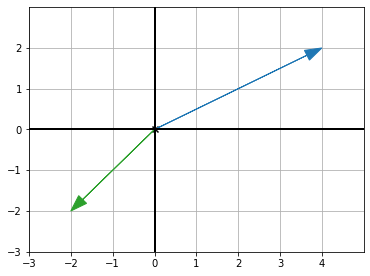

In [14]:
u = (4, 2)
v = (-2, -2)

dot_product_result = dot_product(u, v)

print('u · v = {}'.format(dot_product_result))

draw2d(
    Arrow2D(u, color=blue),
    Arrow2D(v, color=green)
)

In this case we wee that the dot product returns a negative value.

Lastly, let's see what happens when we compute the dot product of perpendicular vectors:

u · v = 0


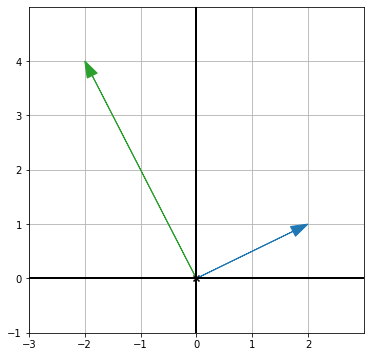

In [15]:
u = (2, 1)
v = (-2, 4)

dot_product_result = dot_product(u, v)

print('u · v = {}'.format(dot_product_result))

draw2d(
    Arrow2D(u, color=blue),
    Arrow2D(v, color=green)
)

As can be seen, the dot product of perpendicular vectors is zero.

To sum up:
> If the angle between two vectors is less than 90° (π/2) the dot product would be positive. If the angle is more than 90° the angle would be negative. If the angle is exactly 90°, the dot product would be zero.
> Longer vectors give longer dot products. That is, the dot product is proportional to each of the lengths of its input vectors.


This fact also applies to 3D vectors:

u · v = 0


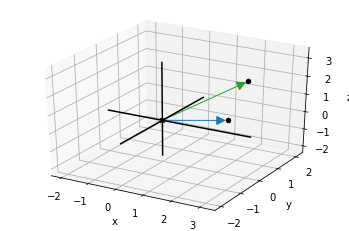

In [16]:
u = (1, 2, -1)
v = (3, 0, 3)

dot_product_result = dot_product(u, v)

print('u · v = {}'.format(dot_product_result))

draw3d(
    Arrow3D(u, color=blue), Points3D(u),
    Arrow3D(v, color=green), Points3D(v)
)

| NOTE: |
| :---- |
| Note that the perspective in the diagram above is a bit misleading and makes you think that the vectors aren't perpendicular. That is why mathematical operations like the dot product are so important. |




Let's now see a simpler implementation of the dot product that does not require importing `prod`:

In [17]:
def dot_product(u, v):
    by_coordinate_zipping = zip(u, v)
    products = [coord_u * coord_v for coord_u, coord_v in by_coordinate_zipping]
    return sum(products)

u = (1, 2, -1)
v = (3, 0, 3)

dot_product_result = dot_product(u, v)

print('u · v = {}'.format(dot_product_result))

u = (2, 3)
v = (4, 5)
dot_product_result = dot_product(u, v)

print('u · v = {}'.format(dot_product_result))


u · v = 0
u · v = 23


The simplification consists in realizing that the dot product is always between two vectors, and therefore, the zipping of u and v coordinates will always have two components:

```Python
u = (u_1, u_2, u_3)
v = (v_1, v_2, v_3)

zip(u, v) => ((u_1, v_1), (u_2, v_2), (u_3, v3))
```

Therefore, we can use a finite number of vars in the list comprehension (namely two), and explicitly perform the product:

```Python
[coord_u * coord_v for coord_u, coord_v in zip(u, v)]
```

It can even be written more succinctly as below:

In [18]:
def dot_product(u, v):
    return sum([coord_u * coord_v for coord_u, coord_v in zip(u, v)])

u = (1, 2, -1)
v = (3, 0, 3)

dot_product_result = dot_product(u, v)

print('u · v = {}'.format(dot_product_result))

u = (2, 3)
v = (4, 5)
dot_product_result = dot_product(u, v)

print('u · v = {}'.format(dot_product_result))

u · v = 0
u · v = 23


Let's use the newly defined function to discover some additional properties of the dot product.

In the first example, we can see that vectors lying on different axes have always as dot product zero.

In [19]:
u = (2, 0)
v = (0, 5)
dot_product_result = dot_product(u, v)
print('u · v = {}'.format(dot_product_result))

u = (1, 0, 0)
v = (0, 0, 5)
dot_product_result = dot_product(u, v)
print('u · v = {}'.format(dot_product_result))


u · v = 0
u · v = 0


The second characteristic is that longer vectors give longer dot products:

In [20]:
u = (3, 4)
v = (2, 3)
dot_product_result = dot_product(u, v)
print('u · v = {}'.format(dot_product_result))

dot_product_result = dot_product(scale(2, u), v)
print('u · v = {}'.format(dot_product_result))

u · v = 18
u · v = 36


The dot product is proportional to each of the lengths of its input vectors. In particular, when the vectors lie in the same direction, the dot product is equal to the product of its lengths:

In [21]:
u = (4, 3)
v = (8, 6)
dot_product_result = dot_product(u, v)
print('u · v = {}'.format(dot_product_result))

print('|u|={}'.format(length(u)))
print('|v|={}'.format(length(v)))

u · v = 50
|u|=5.0
|v|=10.0


The dot product of two vectors of length $ |u| $ and $ |v| $ ranges from $ |u| \cdot |v| $ when they lie in the same direction to $ - |u| \cdot |v| $ when they lie in opposite directions.
The dot product of those two vectors will be zero when they are in an 90° angle.

## Measuring Angles with the Dot Product

We've seen that the dot product ranges from 1 to -1 times the product of the lengths of the vectors being *dot multiplied*, as the angles ranges from 0° to 180°.

Let's remember now the behavior of one of the trigonometric functions we saw in the previous chapter: the *cosine*.

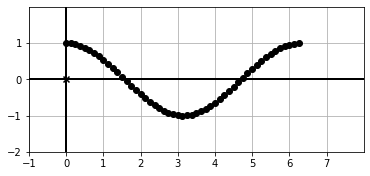

In [22]:
import numpy as np
from math import cos, pi
from draw2d import Points2D

x_values = [x for x in np.arange(0, 2*pi, 0.125)]
y_values = [cos(x) for x in x_values]

points = zip(x_values, y_values)

draw2d(
    Points2D(*points)
)

Actually, it will look better if we use `matplotlib` directly:

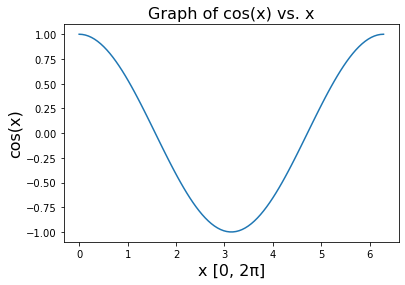

In [23]:
import matplotlib.pyplot as plt

# NumPy seems to be super-useful: get 100 numbers evenly spaced in the range [0, 2*pi]
x = np.linspace(0, 2 *pi, 100) 
plt.plot(x , np.cos(x)) # look ma, no list comprehensions with np.cos()
plt.title('Graph of cos(x) vs. x', fontsize=16)
plt.xlabel('x [0, 2π]', fontsize=16)
plt.ylabel('cos(x)', fontsize=16)
plt.show()

So we see that cos(0°) = 1, cos(90°) = 0, cos(180°) = -1...

It turns out, that the dot product can also be calculated as:

$
 \vec{u} \cdot \vec{v} = |\vec{u}| \cdot |\vec{v}| \cdot cos(\theta)
$

where $ \theta $ is the angle between $ \vec{u} $ and $ \vec{v} $.

This gives us a new way to calculate the dot product. For example, given two vectors of length 3 and 2 that are 75° apart:

In [24]:
def to_radians(degrees):
  return (degrees * pi) / 180

dot_product_result = 3 * 2 * cos(to_radians(75))

print('u · v = {}'.format(dot_product_result))

u · v = 1.5529142706151244


This also gives us a way to calculate the angle between two vectors, given their Cartesian coordinates.

For example, the angle between (3, 4) and (4, 3) is:

$
u = (3, 4) \\
v = (4, 3) \\
u \cdot v = 3 \cdot 4 + 4 \cdot 3 = 24 = |u| \cdot |v| \cdot cos(\theta) = \\
= 5 \cdot 5 \cdot cos(\theta) \\
\theta = arccos(\frac{24}{25}) \approx 0.284 \approx 16.3°
$


angle between u and v = 0.283794109208328 radians = 16.260204708311967 °


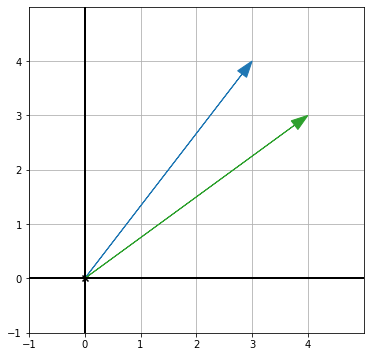

In [25]:
from math import acos

def to_degrees(radians):
  return (radians * 180) / pi

u = (3, 4)
v = (4, 3)

u_length = length(u)
v_length = length(v)
dot_product_result = dot_product(u, v)

theta = acos(dot_product_result / (u_length * v_length))

print('angle between u and v = {} radians = {} °'.format(theta, to_degrees(theta)))

draw2d(
    Arrow2D(u, color=blue),
    Arrow2D(v, color=green)
)



The formula is valid in any dimension.

For example, the angle between (1, 2, 2) and (2, 2, 1):

θ = 0.47588224966041665 radians = 27.266044450732828 °


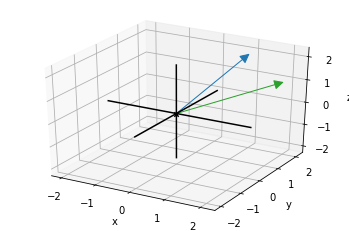

In [26]:
u = (1, 2, 2)
v = (2, 2, 1)

def angle_between_vectors(u, v):
    return acos(dot_product(u, v) / (length(u) * length(v)))

theta = angle_between_vectors(u, v)
print('θ = {} radians = {} °'.format(theta, to_degrees(theta)))

draw3d(
    Arrow3D(u, color=blue),
    Arrow3D(v, color=green)
)

## The cross product: Measuring oriented area

Before jumping into the cross product definition, is important to clarify the orientation. In order to clarify the orientation of the axis (which direction points to the positive, x, y and z) the *right-hand rule* is used:
> If you point your right index finger towards the positive y axis, your thumb tells you the direction of the positive z.

![Right-hand rule](../images/right-hand_rule.png)

We will use the right-handed orientation.

Given two input vectors, the cross product output a result that is perpendicular to both, in the direction of the right-hand rule.
![Cross Product](../images/cross_product.png)

With regards to the length, the cross product measures how *perpendicular* the vectors are. That is, it tells us how big the are spanned by the two input vectors are.

![Cross Product Geometrically](../images/cross_product_geometrically.png)

Thus, for two any given vectors, the area will be maximized when they are perpendicular (it will be a rectangle), and zero when the vectors lie in the same direction (area will be zero).

Let's finally give the formula and the Python function for the cross product of two vectors:

Let $ u = (u_x, u_y, u_z) $ and $ v = (v_x, v_y, v_z) $. 
Then:

$
\vec{u} \times \vec{v} = (u_y \cdot v_z - u_z \cdot v_y, u_z \cdot v_x - u_x \cdot v_z, u_x \cdot v_y - u_y \cdot v_x) 
$

In [27]:
def cross_product(u, v):
    ux, uy, uz = u
    vx, vy, vz = v
    return (uy * vz - uz * vy, uz * vx - ux * vz, ux * vy - uy * vx)

u = (1, 1, 0)
v = (-2, 1, 0)

print('u x v = {}'.format(u, v))


u x v = (1, 1, 0)


### Above and Beyond

The formula for the cross product can be easily remembered using *formal determinant* notation:

$
u \times v = (u_x, u_y, u_z) \times (v_x, v_y, v_z) = \\
= \begin{vmatrix}
i & j & k \\
u_x & u_y & u_z \\
v_x & v_y & v_z
\end{vmatrix} = \\
= i \cdot \begin{vmatrix}
u_y & u_z \\
v_y & v_z
\end{vmatrix} - j \cdot \begin{vmatrix}
u_x & u_z \\
v_x & v_z
\end{vmatrix} + k \cdot \begin{vmatrix}
u_x & u_y \\
v_x & v_y
\end{vmatrix} = \\
= (u_y \cdot v_z - u_z \cdot v_y, \hspace{1ex} u_z \cdot v_x - u_x \cdot v_z, \hspace{1ex} u_x \cdot v_y - u_y \cdot v_x)
$

Where $ i $, $ j $ and $ k $ are the standard basis vectors:

![Standard Basis vectors](../images/standard-basis-i-j-k.png)

$
\vec{i} = (1, 0, 0) \\
\vec{j} = (0, 1, 0) \\
\vec{k} = (0, 0, 1)
$

And because of the cross product definition discussed above (cross product is a vector perpendicular to the vectors being multiplied, and whose length is the area of the parallelogram delimited by those vectors) we can see that:

$
i \times j = k \\
j \times k = i \\
k \times i = j
$

and 

$
j \times i = -k \\
k \times j = -i \\
i \times k = -j
$

and also:

$ 
i \times i = j \times j = k \times k = \vec{0}
$

Any vector can be represented using the standard basis:

$
u = u_x \cdot \vec{i} + u_y \cdot \vec{j} + u_z \cdot \vec{k} \\
v = v_x \cdot \vec{i} + v_y \cdot \vec{j} + v_z \cdot \vec{k}
$

When denoted in such a way, the cross product can be expanded using distributivity:

$
u \times v = (u_x \cdot \vec{i} + u_y \cdot \vec{j} + u_z \cdot \vec{k}) \times v_x \cdot \vec{i} + v_y \cdot \vec{j} + v_z \cdot \vec{k} \\
= u_x v_x (i \times i) + u_x v_y (i \times j) + u_x v_z (i \times k) + \\
u_y v_x (j \times i) + u_y v_y (j \times j) + u_y v_z (j \times k) + \\
u_z v_x (k \times i) + u_z v_y (k \times j) + u_z v_z (k \times k) = \\
u_x v_y k + u_x v_z (-j) + \\
u_y v_x (-k) + u_y v_z i + \\
u_z v_x j + u_z v_y (-i) = \\
(u_y v_z - u_z v_y) i + (u_z v_x - u_x v_z) j + (u_x v_y - u_y v_x) k \\
= (u_y \cdot v_z - u_z \cdot v_y, \hspace{1ex} u_z \cdot v_x - u_x \cdot v_z, \hspace{1ex} u_x \cdot v_y - u_y \cdot v_x)
$


Using the standard basis, we can also define the cross product as:

$ \vec{u} \times \vec{v} = |\vec{u}| \cdot |\vec{v}| \cdot sin(\theta) \cdot \vec{n} $

where theta is the angle between $ \vec{u} $ and $ \vec{v} $ and $ \vec{n} $ is a unit vector perpendicular to the plane containing  $ \vec{u} $ and $ \vec{v} $.

Note also that the area of the parallelogram defined by a couple of vectors $ u $ and $ v $ is $ |u| \cdot |v| \cdot sin(\theta) $. This finally closes the circle and demonstrations on the cross product.


## Rendering a 3D object in 2D

Let's use what we've learnt to render a simple 3D shape: an octahedron.

An octahedron has eight faces, all of which are triangles (it's like two, four-sided pyramids stacked on top of each other).

![Octahedron](../images/octahedron.png)

Note that if the octahedron were solid, we would only be able to see the for triangular faces in the front, but not the ones in the back.

Rendering that shape will come down to identifying the four triangles we need to show and shade them appropriately.


### Defining a 3D object with vectors

An octahedron has six vertices. We can give them simple coordinates:

+ visible &mdash; (1, 0, 0), (0, 1, 0), (0, 0, 1)
+ hidden &mdash; (-1, 0, 0), (0, -1, 0), (0, 0, -1)

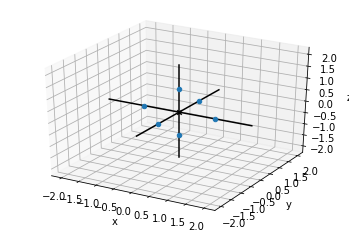

In [28]:
octahedron_vertices = [(1, 0, 0), (0, 1, 0), (0, 0, 1),
(-1, 0, 0), (0, -1, 0), (0, 0, -1)]

draw3d(
    Points3D(*octahedron_vertices, color=blue)
)

We also need to decide which of these vertices connect to form the *edges* of the shape.

For example, the vertex `(0, 0, 1)` at the top of the octahedron connects with all the four points in the plane z=0:

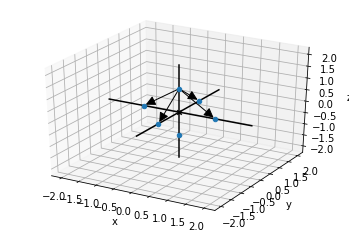

In [29]:
octahedron_edges=[
    Arrow3D((1, 0, 0), (0, 0, 1), color=black),
    Arrow3D((0, 1, 0), (0, 0, 1), color=black),
    Arrow3D((0, -1, 0), (0, 0, 1), color=black),
    Arrow3D((-1, 0, 0), (0, 0, 1), color=black)
]

draw3d(
    *octahedron_edges,
    Points3D(*octahedron_vertices, color=blue)
)


Even with the *edges* themselves we still don't have enough to complete the drawing. We also need to know which vertices and edges define the triangular faces we want to fill with a shade of color. Those will be the ones facing towards us.

The strategy will be as follows: 
+ We'll model a triangular face as three vectors $ \vec{v1} $, $ \vec{v2} $, and $ \vec{v3} $.
+ We'll order $ \vec{v1} $, $ \vec{v2} $, and $ \vec{v3} $ such that $ (v2 - v1) \times (v3 - v1) $ points outside of the octahedron.
+ If an outward-pointing vector is aimed towards us, we'll consider the face to be visible. Otherwise, we will consider it as hidden and we won't draw it.

Let's draw these components:

(-1, 0, -1)


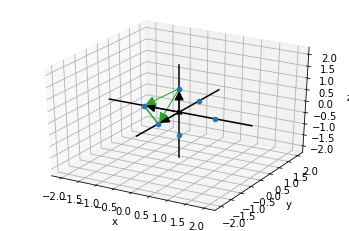

In [30]:
from draw3d import gray, green
v1 = (0, 0, 1)
v2 = (-1, 0, 0)
v3 = (0, -1, 0)

print(subtract(v2, v1))

draw3d(
    Arrow3D(v1, color=black), Points3D(v1, color=gray),
    Arrow3D(v2, color=black), Points3D(v2, color=gray),
    Arrow3D(v3, color=black), Points3D(v3, color=gray),

    # v2 - v1, with tail on v1
    Arrow3D(add(v1, subtract(v2, v1)), v1, color=green),

    # v3 - v1, with tail on v1
    Arrow3D(add(v1, subtract(v3, v1)), v1, color=green),

    Segment3D(v2, v3, color=green),

    Points3D(*octahedron_vertices, color=blue)    
)

Therefore, it feels like we will be able to define the 8 triangular faces as sets of three vectors (triples):

In [31]:
octahedron_faces = [ 
      [(1, 0, 0), (0, 1, 0), (0, 0, 1)],
      [(1, 0, 0), (0, 0, -1), (0, 1, 0)],
      [(1, 0, 0), (0, 0, 1), (0, -1, 0)],
      [(1, 0, 0), (0, -1, 0), (0, 0, -1)],
      [(-1, 0, 0), (0, 0, 1), (0, 1, 0)],
      [(-1, 0, 0), (0, 1, 0), (0, 0, -1)],
      [(-1, 0, 0), (0, -1, 0), (0, 0, 1)],
      [(-1, 0, 0), (0, 0, -1), (0, -1, 0)]
]

That variable defines the vertices for the 8 faces of the octahedron.

We can define a support function `vertices(...)` that will return the set of vertices for a given face:

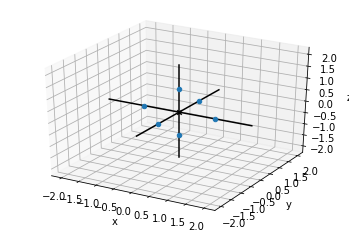

In [32]:
def vertices(faces):
    return list(set([vertex for face in faces for vertex in face]))

octahedron_vertices = vertices(octahedron_faces)

draw3d(
    Points3D(*octahedron_vertices, color=blue)
)

### Projecting to 2D

To turn 3D points into 2D points, we must choose what 3D directions we are observing from.

Once we have two 3D vectors defining *up* and *right* from our perspective, it will be possible to project any 3D vector onto them and get two components instead of three.

The following function extracts the part of any 3D vector pointing in a given direction using the dot product:

In [33]:
def component(v, direction):
    return (dot_product(v, direction) / length(direction))

With two directions hard-coded (in our case (1, 0, 0) and (0, 1, 0)), we can establish a way to project from 3D to 2D.

The following function takes a 3D vector or tuple or three numbers and returns a 2D vector:

In [34]:
def vector_to_2d(v):
    return (component(v, (1, 0, 0)), component(v, (0, 1, 0)))

This can be pictured as as a flattening of a 3D vector into the plane *z=0*.

![3D to 2D projection](../images/3d-to-2d-projection.png)

Finally, a whole shape can be *flattened* by applying the `vector_to_2d(...)` to all the vertices of the shape face:

In [35]:
def face_to_2d(face):
    return [vector_to_2d(vertex) for vertex in face]

### Orienting Faces and Shading

Shading consists in picking a fixed color for each triangle according to how much the triangle faces a given light source.

For example, if the light source is at `(1, 2, 3)` from the origin, the brightness will be decided by how close to perpendicular it is to the light. Alternatively, we can measure how aligned a perpendicular vector to the face of the triangle is with the light source.

Colors are obtained directly from `matplotlib` using:

In [36]:
import matplotlib

blues = matplotlib.cm.get_cmap('Blues')

`blues(...)` is actually a function that maps numbers from `0` to `1` from darker to brighter values.

Given a vector *normal* (perpendicular) to each face, and a vector pointing to the light source, their dot product will tell us how aligned they are. Also, as we're only interested in directions, we can choose vectors with length 1. Thus, if the face is pointing towards the light source, the dot product will lie between `0` and `1`. If it is further than 90° from the light source, it will not be illuminated at all.

The following function takes a vector and returns another in the same direction but with length 1:

In [37]:
def unit(v):
    return scale(1. / length(v), v)

The following function takes a face and gives us the normal to it, that is, a vector that is perpendicular to it:

In [38]:
def normal(face):
    return (cross_product(subtract(face[1], face[0]), subtract(face[2], face[0])))

Now, we can put everything together in the `render(...)` function that will take the faces of a 3D shape:

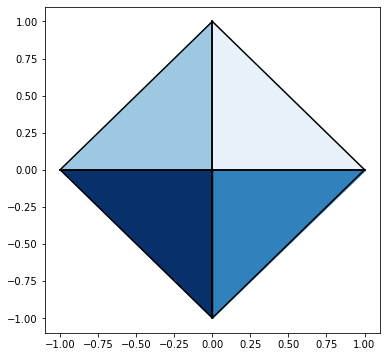

In [39]:
from draw2d import Polygon2D

def render(faces, light=(1, 2, 3), color_map=blues, lines=None):
    polygons = []
    for face in faces:
        unit_normal = unit(normal(face))
        if unit_normal[2] > 0:
            c = color_map(1 - dot_product(unit(normal(face)), unit(light)))
            p = Polygon2D(*face_to_2d(face), fill=c, color=lines)
            polygons.append(p)
    draw2d(*polygons, axes=False, origin=False, grid=None)

render(octahedron_faces, color_map=blues, lines=black)

That doesn't look like much, but if we add many more triangular shapes we can verify that our `render(...)` works quite well:

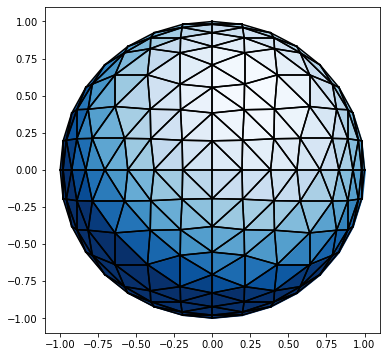

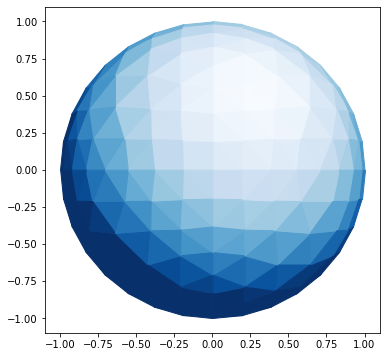

In [40]:
def split(face):
    midpoints = [unit(add(face[i], face[(i+1)%len(face)])) for i in range(0,len(face))]
    triangles = [(face[i], midpoints[i], midpoints[(i-1)%len(face)]) for i in range(0,len(face))]
    return [midpoints] + triangles

def rec_split(faces, depth=0):
    if depth == 0:
        return faces
    else:
        return rec_split([new_face for face in faces for new_face in split(face)], depth-1)

def sphere_approx(n):
    return rec_split(octahedron_faces, n)

render(sphere_approx(3), lines=black),
render(sphere_approx(3), lines=None)

## You know you've mastered this chapter when...

+ You are aware that to draw 3D objects on a computer display you need to use tricks like projections, decomposition in triangles and shading.
+ You are comfortable drawing and picturing individual 3D vectors using their Cartesian coordinates.
+ You're comfortable using the `draw3d` library and the `Arrow3D`, `Segment3D` and `Points3D` functions.
+ You know how to add and subtract vectors in 3D. You're comfortable understanding that the rules can be extended for vectors of any dimension. 
+ You understand that the displacement vector in 3D is the vector that takes us from one point to another, and that the subtraction of two vectors is the operation that gives us that vector.
+ You're comfortable computing the scalar product of a vector in 3D. You're aware that the rules can be extended for vectors of any dimension.
+ You can calculate the length of a vector in 3D. You're aware that the same formula can be used to calculate the length of a vector of any dimension.
+ You're aware that 3D vectors can also be represented in alternative coordinates known *spherical coordinates* that use three values to identify the vector: its length, the angle of the vector projection on the *xy plane* and its angle with the z axis.
+ You can perform the dot product of two vectors in 2D and 3D and understand that it is a measure of how two vectors are aligned. In particular, if two vectors are perpendicular, their dot product is zero. You're aware that the dot product can be extended to vectors of any dimension.
+ You're comfortable understanding that the dot product is also $ u \cdot v = |u| \cdot |v| \cdot cos(\theta) = u_x v_x + u_y v_y + u_z v_z  $
+ You're comfortable calculating the *cross product* of two vectors, and understand that it gives us a vector perpendicular to the two given with a length proportional to the area of the parallelogram the vectors define.
+ You understand why the orientation of the axis is important, and are comfortable with the right-hand rule to calculate the orientation of the cross product.
+ You're aware that the length of the cross product is $ |u| \cdot |v| \cdot cos(\theta), because that is the formula for the area of the parallelogram. You can also deduce the formula for the cross product using the *determinant* matrix.
+ You understand the steps needed to render a simple 3D object in 2D space.